In [64]:
import pandas as pd
import pprint
import collections
import opensmile
import numpy as np
import librosa
import matplotlib.pyplot as plt
import pyworld as pw

In [65]:
sampling_rate = 16000
signal = np.zeros(sampling_rate)
csv_path = "/Volumes/mac-ssd/face_csv/h-20220330_screen_off.csv"
voice_wav_path = "/Volumes/mac-ssd/movie/converted_data/g3_20220330_screen_off/h-20220330_screen_off.wav"

In [66]:
# 特徴量算出用のパラメタ
frame_length = 2048 # 特徴量を１つ算出するのに使うサンプル数
hop_length   = 512 # 何サンプルずらして特徴量を算出するかを決める変数
n_mfcc = 20

y, sr = librosa.load(voice_wav_path)
rms   = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
rms, sr

(array([3.4781184e-05, 4.4029297e-05, 5.2281714e-05, ..., 4.3365591e-05,
        3.4190005e-05, 2.6660255e-05], dtype=float32),
 22050)

<ipython-input-67-55c3b2f27daa>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


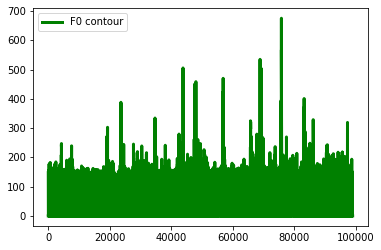

In [67]:
y = y.astype(np.float)
_f0, _time = pw.dio(y, sr)
f0 = pw.stonemask(y, _f0, _time, sr)
plt.plot(f0, linewidth=3, color="green", label="F0 contour")
plt.legend(fontsize=10)
plt.show()

In [68]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)
output_open_smile_features = smile.process_file(voice_wav_path)
output_open_smile_features

Loudness_sma3  \
file                                               start                  end                                     
/Volumes/mac-ssd/movie/converted_data/g3_202203... 0 days 00:00:00        0 days 00:00:00.020000       0.025338   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       0.025268   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000       0.025424   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000       0.026080   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000       0.026823   
...                                                                                                         ...   
                                                   0 days 00:08:14.950000 0 days 00:08:14.970000       0.018842   
                                                   0 days 00:08:14.960000 0 days 00:08:14.980000       0.019620   
                                                   0 days 00:08:14.970000 0 days 00:08:14.990000       0.020080   
                                                   0 days 00:08:14.980000 0 days 00:08:15              0.021008   
                                                   0 days 00:08:14.990000 0 days 00:08:15.040000       0.018937   

                                                                                                  alphaRatio_sma3  \
file                                               start                  end                                       
/Volumes/mac-ssd/movie/converted_data/g3_202203... 0 days 00:00:00        0 days 00:00:00.020000         6.237439   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000         4.971154   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000         4.109633   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000         4.308451   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000         5.733840   
...                                                                                                           ...   
                                                   0 days 00:08:14.950000 0 days 00:08:14.970000        -2.991693   
                                                   0 days 00:08:14.960000 0 days 00:08:14.980000        -1.423492   
                                                   0 days 00:08:14.970000 0 days 00:08:14.990000        -0.818365   
                                                   0 days 00:08:14.980000 0 days 00:08:15                1.747415   
                                                   0 days 00:08:14.990000 0 days 00:08:15.040000         0.338213   

                                                                                                  hammarbergIndex_sma3  \
file                                               start                  end                                            
/Volumes/mac-ssd/movie/converted_data/g3_202203... 0 days 00:00:00        0 days 00:00:00.020000             -2.168790   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000             -0.550206   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000             -1.070297   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000             -0.198402   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000              0.723121   
...                                                                                                                ...   
                                                   0 days 00:08:14.950000 0 days 00:08:14.970000        

In [69]:
smile.feature_names

['Loudness_sma3',
 'alphaRatio_sma3',
 'hammarbergIndex_sma3',
 'slope0-500_sma3',
 'slope500-1500_sma3',
 'spectralFlux_sma3',
 'mfcc1_sma3',
 'mfcc2_sma3',
 'mfcc3_sma3',
 'mfcc4_sma3',
 'F0semitoneFrom27.5Hz_sma3nz',
 'jitterLocal_sma3nz',
 'shimmerLocaldB_sma3nz',
 'HNRdBACF_sma3nz',
 'logRelF0-H1-H2_sma3nz',
 'logRelF0-H1-A3_sma3nz',
 'F1frequency_sma3nz',
 'F1bandwidth_sma3nz',
 'F1amplitudeLogRelF0_sma3nz',
 'F2frequency_sma3nz',
 'F2bandwidth_sma3nz',
 'F2amplitudeLogRelF0_sma3nz',
 'F3frequency_sma3nz',
 'F3bandwidth_sma3nz',
 'F3amplitudeLogRelF0_sma3nz']

In [70]:
df = pd.read_csv(csv_path)
df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.00,0.98,1,0.097241,0.205349,-0.973846,-0.132558,0.232643,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2,0,0.04,0.98,1,0.144043,0.178547,-0.973331,-0.070014,0.195650,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,0,0.08,0.98,1,0.166348,0.169606,-0.971371,-0.066007,0.189750,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,4,0,0.12,0.98,1,0.171282,0.176877,-0.969215,-0.074500,0.192504,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,0,0.16,0.98,1,0.166614,0.178173,-0.969791,-0.075831,0.183660,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,12372,0,494.84,0.98,1,0.127985,0.238336,-0.962713,-0.123813,0.259066,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12372,12373,0,494.88,0.98,1,0.134856,0.232383,-0.963230,-0.121210,0.253286,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12373,12374,0,494.92,0.98,1,0.131354,0.236030,-0.962827,-0.125583,0.256038,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12374,12375,0,494.96,0.98,1,0.136604,0.231575,-0.963178,-0.117769,0.245763,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [71]:
frame_number = df[" timestamp"][1]
frame_number

0.04

In [72]:
output_open_smile_features_reindex = output_open_smile_features.reset_index()
output_open_smile_features_reindex

,file,start,end,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
0,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:00:00,0 days 00:00:00.020000,0.025338,6.237439,-2.168790,0.042279,0.017566,0.000457,0.194668,...,0.0,467.872559,549.591125,-201.0,1455.539062,531.618774,-201.0,2501.871094,514.565247,-201.0
1,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:00:00.010000,0 days 00:00:00.030000,0.025268,4.971154,-0.550206,0.049130,0.019699,0.000868,1.490472,...,0.0,496.505615,587.155334,-201.0,1448.886597,606.002014,-201.0,2515.779541,496.547760,-201.0
2,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:00:00.020000,0 days 00:00:00.040000,0.025424,4.109633,-1.070297,0.049035,0.020006,0.001279,2.507981,...,0.0,534.871582,784.342224,-201.0,1397.350952,772.800232,-201.0,2473.808350,493.082397,-201.0
3,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:00:00.030000,0 days 00:00:00.050000,0.026080,4.308451,-0.198402,0.052288,0.012638,0.001311,2.101798,...,0.0,523.682068,947.029968,-201.0,1394.194458,971.624207,-201.0,2529.385498,468.965485,-201.0
4,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:00:00.040000,0 days 00:00:00.060000,0.026823,5.733840,0.723121,0.046922,0.012148,0.001364,1.230646,...,0.0,530.495422,901.893372,-201.0,1455.662720,1079.715942,-201.0,2577.369873,765.289490,-201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:08:14.950000,0 days 00:08:14.970000,0.018842,-2.991693,14.473939,0.036852,0.017137,0.001084,13.650833,...,0.0,747.909485,1490.151489,-201.0,1380.936035,1184.020996,-201.0,2654.146484,871.112061,-201.0
49496,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:08:14.960000,0 days 00:08:14.980000,0.019620,-1.423492,12.838635,0.049143,0.011438,0.001214,12.930821,...,0.0,671.397949,1299.209473,-201.0,1492.730591,991.601135,-201.0,2824.304443,658.013245,-201.0
49497,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:08:14.970000,0 days 00:08:14.990000,0.020080,-0.818365,13.753227,0.043582,0.016704,0.001194,12.236930,...,0.0,539.361877,1384.545532,-201.0,1278.939331,1054.982056,-201.0,2682.495361,682.097290,-201.0
49498,/Volumes/mac-ssd/movie/converted_data/g3_20220...,0 days 00:08:14.980000,0 days 00:08:15,0.021008,1.747415,11.287063,0.046969,0.016286,0.001208,13.218890,...,0.0,539.365967,1071.492920,-201.0,1353.561157,1003.469788,-201.0,2674.468506,667.255005,-201.0


In [76]:
output_open_smile_features_resampled = output_open_smile_features_reindex.resample('40ms', on='start').mean()
output_open_smile_features_resampled

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
start,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.025528,4.906669,-0.996924,0.048183,0.017477,0.000979,1.573730,-14.420338,8.178292,0.593815,...,0.0,505.732971,717.029663,-201.0,1423.992798,720.511292,-201.0,2505.211182,493.290222,-201.0
0 days 00:00:00.040000,0.026431,5.706769,4.450272,0.037077,0.016040,0.001381,3.062252,-15.081575,6.899125,2.707529,...,0.0,572.058289,717.539429,-201.0,1509.824829,989.391785,-201.0,2627.702148,656.393921,-201.0
0 days 00:00:00.080000,0.025975,3.825420,-0.125119,0.044040,0.014836,0.001182,3.159675,-10.998038,9.690477,-1.352789,...,0.0,675.846497,997.317993,-201.0,1760.712036,1210.132446,-201.0,2588.384033,1589.515625,-201.0
0 days 00:00:00.120000,0.031197,-2.586186,10.386384,0.027770,0.012218,0.002511,9.959372,-15.759361,5.180684,-3.276563,...,0.0,498.566986,955.143921,-201.0,1539.440063,877.537781,-201.0,2627.376953,714.185181,-201.0
0 days 00:00:00.160000,0.032631,1.444118,9.126515,0.031513,0.008685,0.002768,13.183253,-23.897104,7.465791,0.261564,...,0.0,606.229004,877.082153,-201.0,1642.865234,734.928650,-201.0,2704.557129,1164.417480,-201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:08:14.800000,0.028324,-1.497242,11.764557,0.005905,0.016115,0.002224,9.422470,-11.956221,26.759544,9.825752,...,0.0,766.301331,818.402039,-201.0,1792.213501,715.106506,-201.0,2908.298828,838.206970,-201.0
0 days 00:08:14.840000,0.023292,2.484158,4.967062,0.031669,0.010988,0.001407,6.146188,-11.670138,14.429383,4.715756,...,0.0,539.422668,833.630920,-201.0,1445.381714,775.782471,-201.0,2395.741211,886.990723,-201.0
0 days 00:08:14.880000,0.018727,-2.722517,12.809374,0.026290,0.017324,0.001284,10.850361,-2.786674,12.299620,16.740479,...,0.0,586.529663,1297.984131,-201.0,1597.647461,778.555664,-201.0,2715.720703,804.179443,-201.0
